# Using Tensorflow to classify handwritten digits (ANN)

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
# !python -m pip install seaborn

### Importing the dataset

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(X_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
print(X_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
def show_train_img(index):
    plt.imshow(X_train[index])
    print(y_train[index])

5


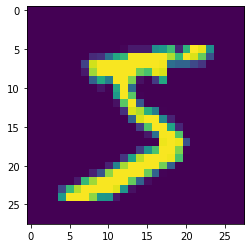

In [8]:
show_train_img(0)

### Scaling the features

In [9]:
X_train = X_train / 255
X_test = X_test / 255

### Flattening our train set

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

### Deep learning model with no hidden layer

In [12]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4689 - accuracy: 0.8763
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3040 - accuracy: 0.9146
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2835 - accuracy: 0.9211
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2729 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2664 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2622 - accuracy: 0.9268
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2584 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2553 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2533 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.250

In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.2650 - accuracy: 0.9270


[0.26504412293434143, 0.9269999861717224]

In [14]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([5.9831678e-03, 2.7653938e-08, 1.8020399e-02, 9.6535116e-01,
       1.3760292e-03, 1.8617424e-01, 3.1097318e-08, 9.9985552e-01,
       9.5805116e-02, 7.1347278e-01], dtype=float32)

In [15]:
def check_prediction(index):
    print("Predicted: ",np.argmax(y_predicted[index]))
    print("Actual:",y_test[index])
    return plt.imshow(X_test[index])

Predicted:  0
Actual: 0


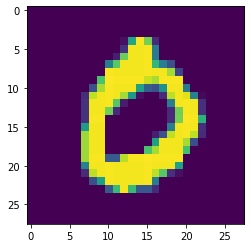

In [55]:
check_prediction(3)

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    8,    6,    3,    2,    0],
       [   0, 1118,    3,    1,    0,    1,    4,    2,    6,    0],
       [   5,   11,  923,   14,    7,    4,   13,    9,   43,    3],
       [   3,    0,   17,  906,    0,   30,    3,   11,   31,    9],
       [   1,    2,    5,    2,  914,    0,   10,    4,    9,   35],
       [   9,    3,    1,   22,    8,  785,   16,    6,   37,    5],
       [   9,    3,    7,    1,    7,   12,  914,    2,    3,    0],
       [   2,    6,   23,    3,    3,    1,    0,  948,    4,   38],
       [   5,   13,    5,   14,    9,   21,    9,    8,  880,   10],
       [   9,    8,    1,    6,   22,    6,    0,   20,   13,  924]])>

Text(69.0, 0.5, 'Truth')

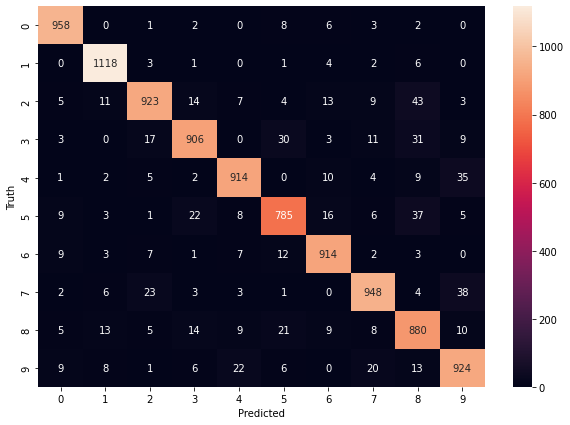

In [18]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Model with 2 hidden layers

In [19]:
model = keras.Sequential([
    keras.layers.Dense(125, input_shape=(784,), activation='relu'),
    keras.layers.Dense(50,activation='tanh'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2379 - accuracy: 0.9308
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0945 - accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0667 - accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0506 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0389 - accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0305 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0270 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0230 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0183 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

In [20]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0823 - accuracy: 0.9794


[0.08232582360506058, 0.9793999791145325]

313/313 [==============================] - 1s 4ms/step


Text(69.0, 0.5, 'Truth')

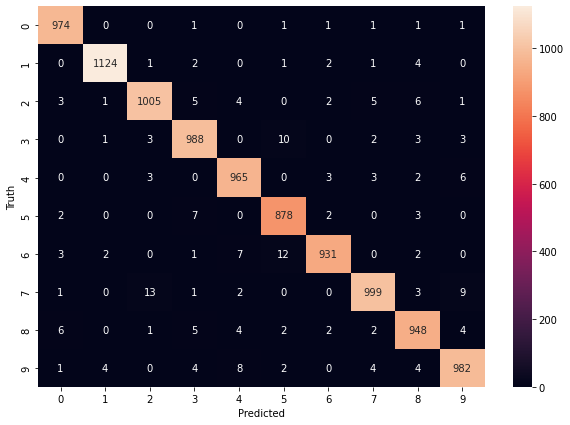

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Model using flatten layer

In [80]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(125, activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 13ms/step - loss: 0.2526 - accuracy: 0.9274
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1070 - accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0738 - accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0557 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0443 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0373 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0297 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0264 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0218 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 24s 13m

In [81]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 8ms/step - loss: 0.0979 - accuracy: 0.9773


[0.0979091227054596, 0.9772999882698059]

### Testing with own image

In [100]:
import cv2
image=cv2.imread('Test_Images/digits_test_img.jpeg',0)
image

array([[142, 141, 141, ..., 141, 142, 142],
       [142, 142, 141, ..., 141, 142, 142],
       [142, 142, 141, ..., 141, 142, 143],
       ...,
       [101, 101, 101, ..., 105, 106, 106],
       [101, 101, 101, ..., 105, 106, 106],
       [101, 101, 101, ..., 105, 106, 106]], dtype=uint8)

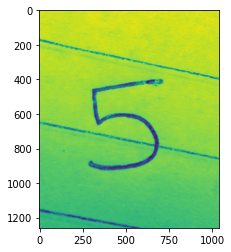

In [101]:
plt.imshow(image)

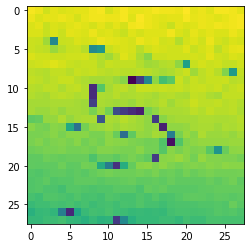

In [102]:
new_img=cv2.resize(image,(28,28))
plt.imshow(new_img)

In [103]:
new_img=new_img/255
image_reshaped = np.reshape(new_img, [1,28,28])

In [104]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 202ms/step
[[1.0644237e-04 3.3038040e-03 9.4377375e-01 2.1209237e-03 3.7468614e-16
  9.9985629e-01 2.7824822e-01 6.4904125e-06 1.3134371e-05 7.3424003e-11]]


In [105]:
input_pred_label = np.argmax(input_prediction)
input_pred_label

5